###### Machine Learning Final Project

###### Dataset Used: https://www.kaggle.com/datasets/yasserh/housing-prices-dataset

###### All the code has been developed from scratch, except for line 50th. The source is mentioned above the cell.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold, train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [2]:
# Load, read the CSV file and handle exceptions

try:
    df = pd.read_csv("/Users/giorgi/Desktop/Housing.csv")
except FileNotFoundError:
    print("The file was not found, Please check the file path.")
except Exception as e:
    print("An error occurred:", e)

In [3]:
# Calculate and print the number of rows and columns

num_records = df.shape[0]
num_columns = df.shape[1]

print(f"The dataset contains {num_records} records (rows) and {num_columns} attributes (columns).")

The dataset contains 545 records (rows) and 13 attributes (columns).


In [4]:
# Display summary without verbose column details

df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Columns: 13 entries, price to furnishingstatus
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
# Summarize and display statistics for object-type columns

df_describe_objects = df.describe(include="object")
styled_table = df_describe_objects.style.set_table_attributes("style='display:inline'").set_caption('Descriptive Statistics for Object-type Columns')
display(styled_table)

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


In [6]:
# Generate and display statistics for numerical columns

df_describe_numerical = df.describe(include=[np.int64, np.float64])
styled_numerical_table = df_describe_numerical.style.set_table_attributes("style='display:inline'").set_caption('Descriptive Statistics for Numerical Columns')
display(styled_numerical_table)

,price,area,bedrooms,bathrooms,stories,parking
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4766729.247706,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1870439.615657,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1750000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3430000.000000,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4340000.000000,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5740000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000
max,13300000.000000,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
# Display sample 5 random rows

df_sample = df.sample(5, random_state=42) 
styled_sample = df_sample.style.set_table_attributes("style='display:inline'").set_caption('Random Sample of 5 Rows')
display(styled_sample)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
316,4060000,5900,4,2,2,no,no,yes,no,no,1,no,unfurnished
77,6650000,6500,3,2,3,yes,no,no,no,yes,0,yes,furnished
360,3710000,4040,2,1,1,yes,no,no,no,no,0,no,semi-furnished
90,6440000,5000,3,1,2,yes,no,no,no,yes,0,no,semi-furnished
493,2800000,3960,3,1,1,yes,no,no,no,no,0,no,furnished


In [8]:
# find and display rows that has some but not all null values

rows_with_some_nulls = df.isnull().any(axis=1)
rows_not_completely_null = ~df.isnull().all(axis=1)
null_entries_df = df[rows_with_some_nulls & rows_not_completely_null]

display(null_entries_df)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


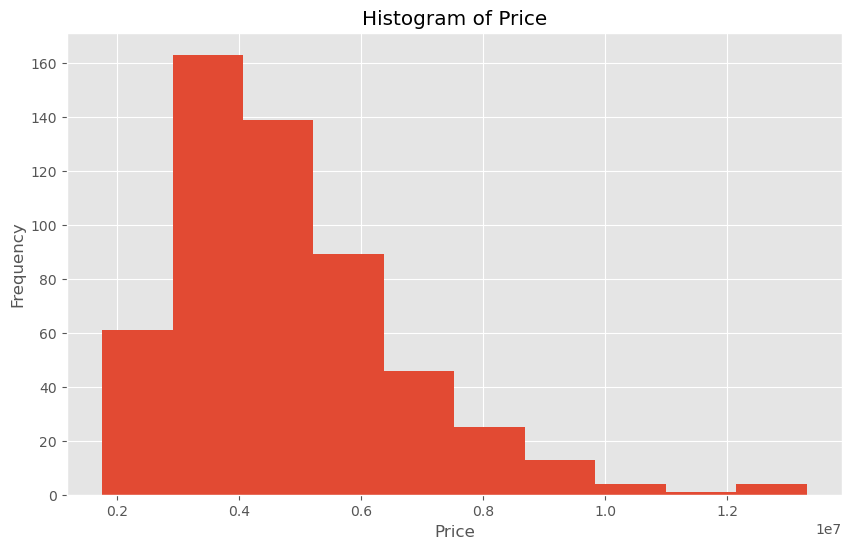

In [9]:
# Create a histogram of the 'price' column

plt.style.use('ggplot')
plt.figure(figsize=(10, 6))

df['price'].plot(kind='hist', bins=10, title='Price Distribution')
plt.xlabel('Price') 
plt.ylabel('Frequency')
plt.title('Histogram of Price')

plt.show() 

<Figure size 1000x1000 with 0 Axes>

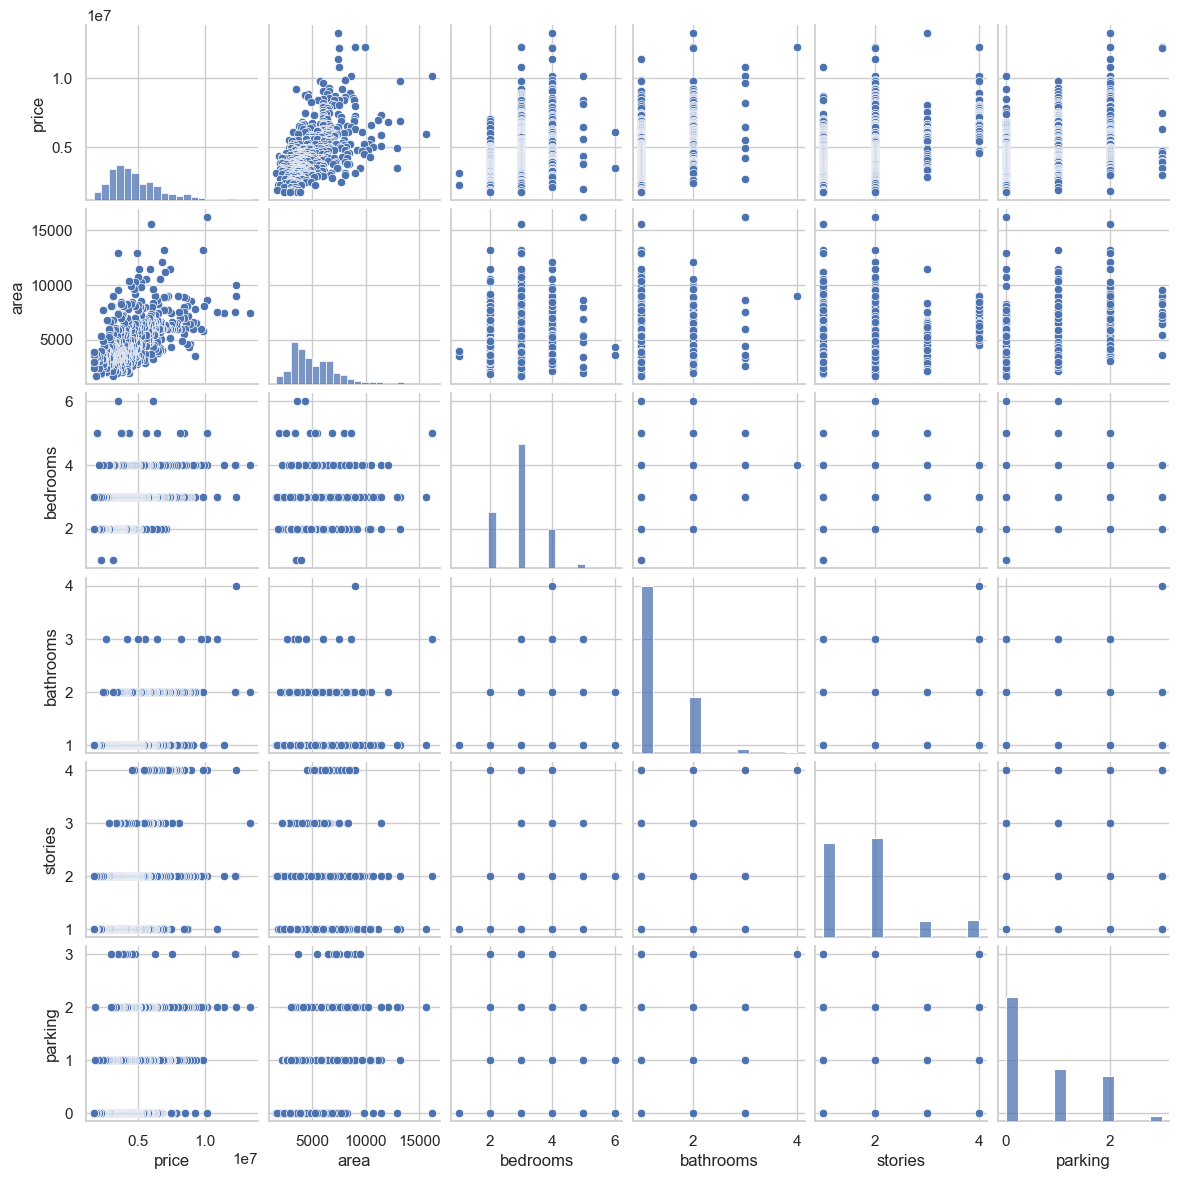

In [10]:
# Display a pairplot from dataset

plt.figure(figsize=(10, 10))
sns.set(style="whitegrid")

ax = sns.pairplot(df, height=2)
plt.show()

In [11]:
# Convert binary columns to (1/0)
# Handle unexpected values/missing columns

binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

for col in binary_cols:
    if col in df.columns and df[col].isin(['yes', 'no']).all():
        df[col] = df[col].map({'yes': 1, 'no': 0})
    else:
        print(f"Column '{col}' is missing or has unexpected values.")

display(df)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [12]:
# Print a list of all categorical columns

cat_cols = df.select_dtypes(include='object').columns
cat_data = df[cat_cols]

print("Categorical Columns:", cat_cols.tolist())

Categorical Columns: ['furnishingstatus']


In [13]:
# Create dummy variables for categorical columns
# Show the first few rows

encoded_data = pd.get_dummies(df, columns=cat_cols)

display(encoded_data.head())

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0


In [14]:
# Print the column names after encoding categorical variables

column_names = encoded_data.columns

print("Column Names in Encoded DataFrame:", list(column_names))

Column Names in Encoded DataFrame: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus_furnished', 'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']


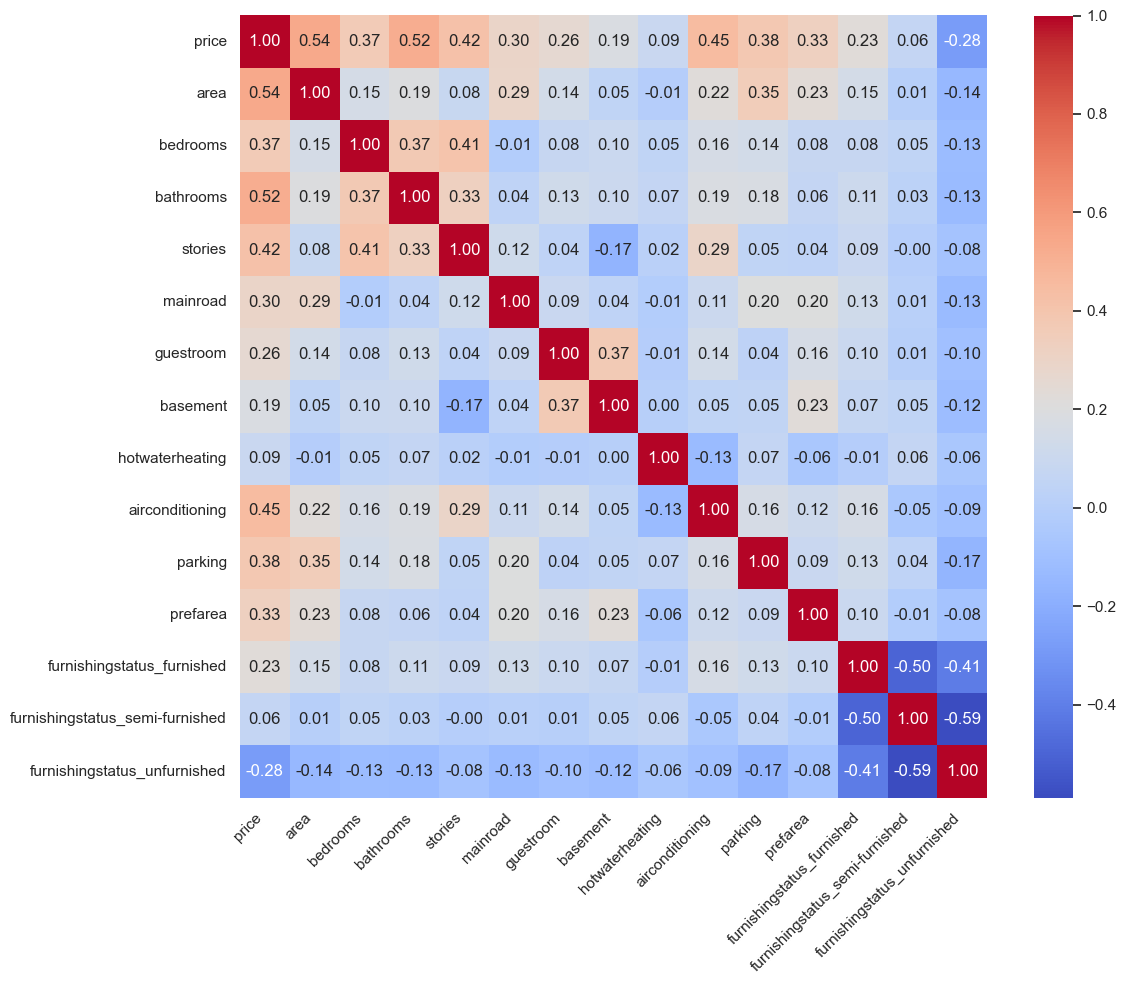

In [15]:
# Create & show a heatmap of the correlation matrix for the encoded data

fig, ax = plt.subplots(figsize=(12, 10))  

corr_matrix = encoded_data.corr()
sns.heatmap(corr_matrix, annot=True, ax=ax, fmt=".2f", cmap='coolwarm')

plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0)  
plt.tight_layout()  

plt.show()

In [16]:
# Sum columns to create a new feature  
# Handle missing columns

columns_to_sum = ['furnishingstatus_semi-furnished', 'furnishingstatus_furnished']

if all(col in encoded_data.columns for col in columns_to_sum):
    interaction_df = encoded_data.copy()
    interaction_df['not_unfurnished'] = interaction_df[columns_to_sum].sum(axis=1)
else:
    print("required columns are missing")

display(interaction_df.head())

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,not_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0,1


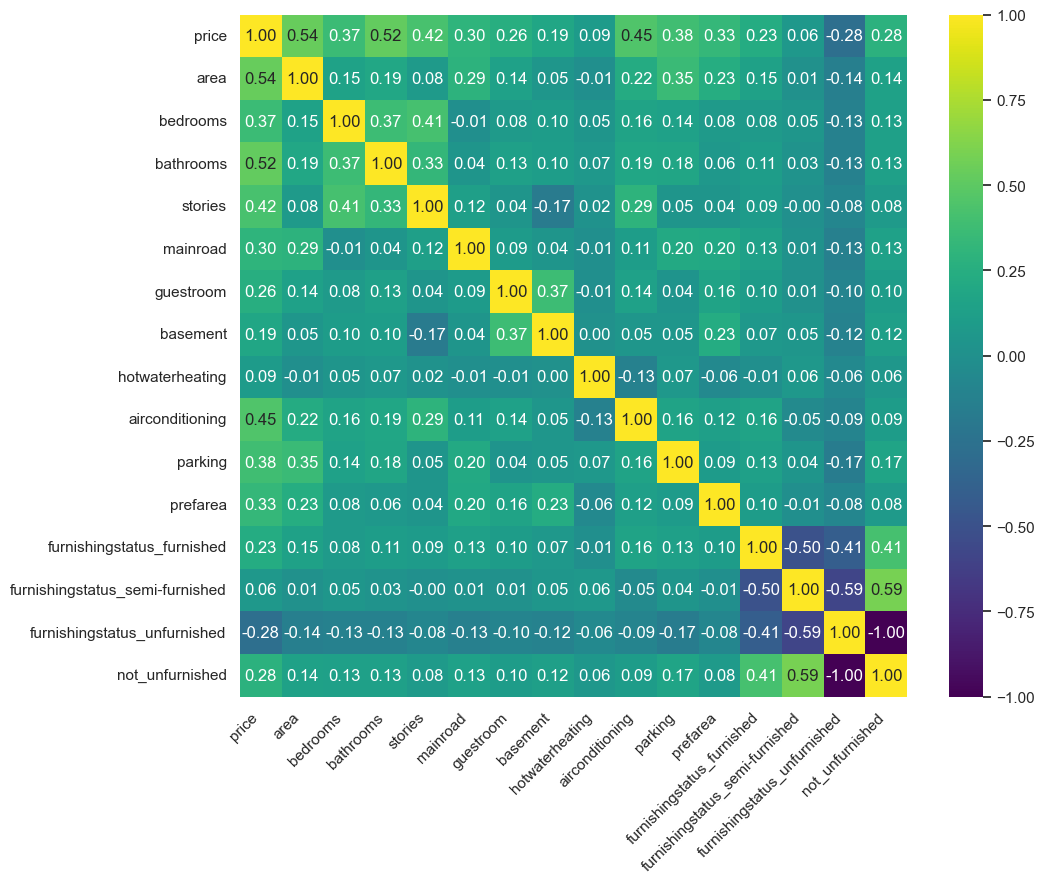

In [17]:
# Create & display a heatmap of the correlation matrix with new feature

fig, ax = plt.subplots(figsize=(11, 9))

corr_matrix_interaction = interaction_df.corr()
sns.heatmap(corr_matrix_interaction, annot=True, ax=ax, fmt=".2f", cmap='viridis')

plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0) 
plt.tight_layout() 

plt.show()

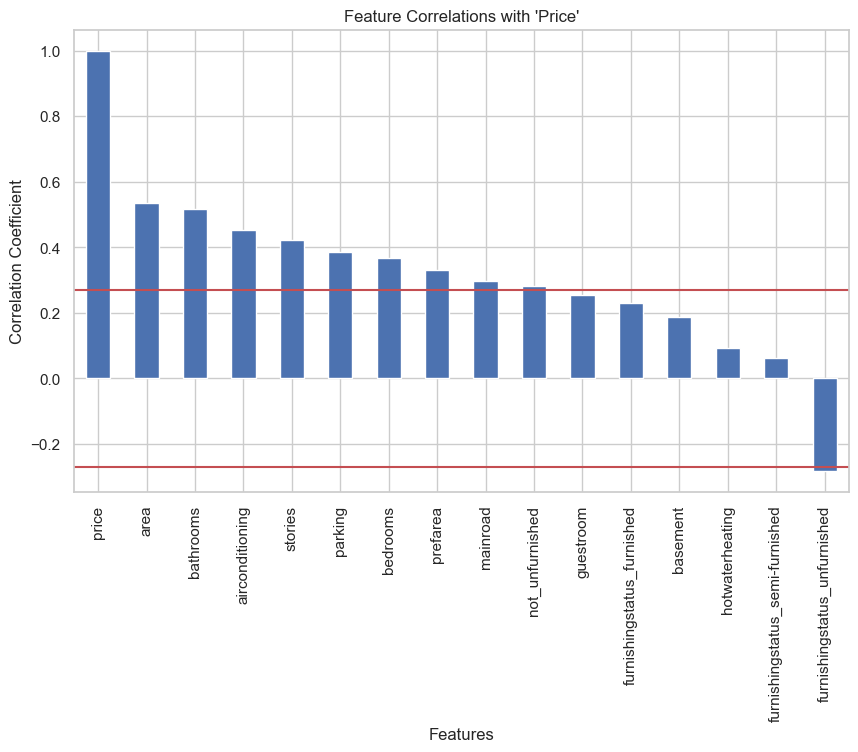


Features to drop (correlation < 0.27): ['guestroom', 'furnishingstatus_furnished', 'basement', 'hotwaterheating', 'furnishingstatus_semi-furnished']


In [18]:
# Set correlation threshold and compute correlations
correlation_threshold = 0.27
correlations = interaction_df.corr()['price'].sort_values(ascending=False)

# Plot the correlation coefficients
plt.figure(figsize=(10, 6))
correlations.plot(kind='bar')
plt.axhline(y=correlation_threshold, color='r', linestyle='-')
plt.axhline(y=-correlation_threshold, color='r', linestyle='-')
plt.title("Feature Correlations with 'Price'")
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.show()

# List features to drop by threshold
features_to_drop = correlations[correlations.abs() < correlation_threshold].index.tolist()
print("\nFeatures to drop (correlation < 0.27):", features_to_drop)

In [19]:
# Set correlation threshold
# Select columns with correlation above it
correlation_threshold = 0.27
selected_columns = correlations[correlations.abs() >= correlation_threshold].index

print("Selected Columns (correlation >= 0.27):", list(selected_columns))

Selected Columns (correlation >= 0.27): ['price', 'area', 'bathrooms', 'airconditioning', 'stories', 'parking', 'bedrooms', 'prefarea', 'mainroad', 'not_unfurnished', 'furnishingstatus_unfurnished']


In [20]:
# Define columns to drop them

columns_to_drop = ['guestroom', 'basement', 'hotwaterheating',
                   'furnishingstatus_furnished', 'furnishingstatus_semi-furnished',
                   'furnishingstatus_unfurnished']

final_data = interaction_df.drop(columns_to_drop, axis=1)

# Show final dataset
display(final_data.head())

,price,area,bedrooms,bathrooms,stories,mainroad,airconditioning,parking,prefarea,not_unfurnished
0,13300000,7420,4,2,3,1,1,2,1,1
1,12250000,8960,4,4,4,1,1,3,0,1
2,12250000,9960,3,2,2,1,0,2,1,1
3,12215000,7500,4,2,2,1,1,3,1,1
4,11410000,7420,4,1,2,1,1,2,0,1


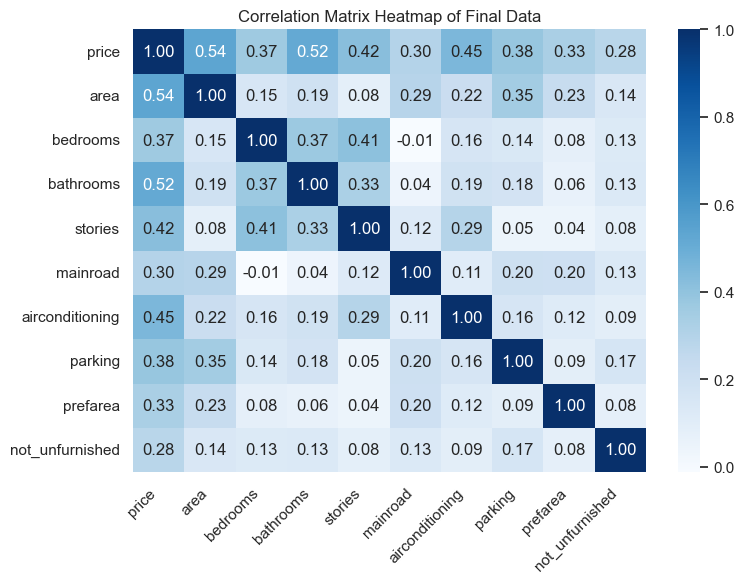

In [21]:
# Create & display a heatmap for correlation matrix for the final dataset

fig, ax = plt.subplots(figsize=(8, 6))

sns.heatmap(final_data.corr(), annot=True, ax=ax, fmt=".2f", cmap='Blues')

plt.xticks(rotation=45, ha='right') 
plt.yticks(rotation=0)  
plt.title("Correlation Matrix Heatmap of Final Data")  
plt.tight_layout()  

plt.show()

# Linear Regression

In [22]:
# Define feature columns and check for missing

feature_columns = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
                   'airconditioning', 'parking', 'prefarea', 'not_unfurnished']

missing_columns = [col for col in feature_columns if col not in final_data.columns]
if missing_columns:
    # Print missing feature columns
    print(f"Missing columns: {missing_columns}")
else:
    # Select features and target variable
    X = final_data[feature_columns] 
    y = final_data['price']  

In [23]:
# Split data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

# Print shapes
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (381, 9)
Shape of X_test: (164, 9)


In [24]:
# Define and print numerical columns

num_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

print("Numerical Columns:", num_cols)

Numerical Columns: ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']


In [25]:
# Create and fit a linear regression model
reg_multi = LinearRegression()

reg_multi.fit(X_train, y_train)

LinearRegression()

In [26]:
# Predict house prices for test data by trained linear regression model

y_pred = reg_multi.predict(X_test)

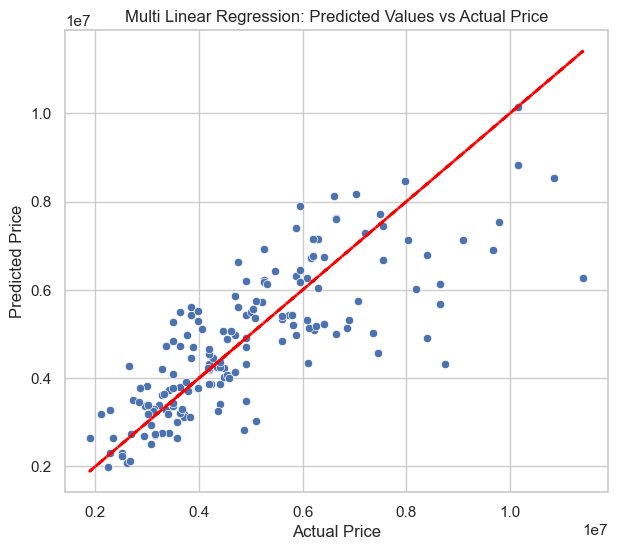

In [27]:
# Plot actual against predicted prices and reference line

fig, ax = plt.subplots(figsize=(7, 6))

sns.scatterplot(x=y_test, y=y_pred, ax=ax)
ax.set(xlabel="Actual Price", ylabel="Predicted Price", title="Multi Linear Regression: Predicted Values vs Actual Price")

plt.plot(y_test, y_test, color='red', linewidth=2, linestyle="--")

plt.show()

In [28]:
# Calculate & print R squared and MSE (Mean Squared Error)

r2 = metrics.r2_score(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)

print(f"R-squared (R²): {r2:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")

R-squared (R²): 0.62
Mean Squared Error (MSE): 1380628736112.17


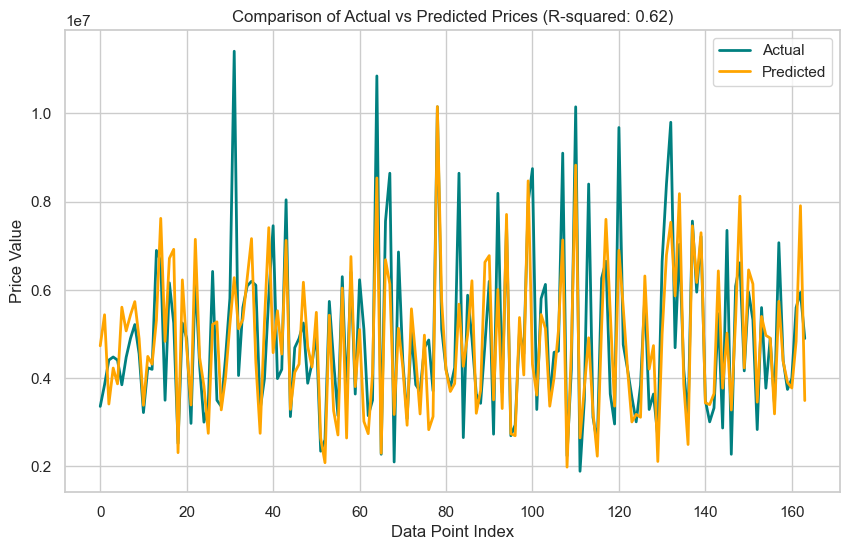

In [29]:
# Plot & compare actual against predicted prices with R-squared value

plt.figure(figsize=(10, 6)) 

plt.plot(np.arange(len(y_test)), y_test, label='Actual', color='teal', linewidth=2)

plt.plot(np.arange(len(y_test)), y_pred, label='Predicted', color='orange', linewidth=2)

plt.xlabel('Data Point Index')
plt.ylabel('Price Value')
plt.title(f'Comparison of Actual vs Predicted Prices (R-squared: {r2:.2f})')

plt.legend()

plt.show()

# Kfold

In [30]:
# Select features and extract values

selected_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'airconditioning', 'parking', 'prefarea', 'not_unfurnished']

X = final_data[selected_features].values 

# Extract the target variable

y = final_data['price'].values

In [31]:
# Split the data into training and test sets
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.2, shuffle=True)

# Print shapes
print("Shape of X_train:", X_tr.shape)
print("Shape of X_test:", X_ts.shape)

Shape of X_train: (436, 9)
Shape of X_test: (109, 9)


In [32]:
# Define variables for cross-validation & tracking the best model

nfold = 30

r2_train = np.zeros(nfold)
r2_val = np.zeros(nfold)
r2_test = np.zeros(nfold)

best_r2 = 0
best_training_data = None

In [33]:
# Cross-validation with KFold & track R-squared values

kf = KFold(n_splits=nfold, shuffle=True)
kf.get_n_splits(X_tr)


for isplit, idx in enumerate(kf.split(X_tr)):

    X_kfold_train, X_val, y_kfold_train, y_val = X_tr[idx[0]], X_tr[idx[1]], y_tr[idx[0]], y_tr[idx[1]]

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X_kfold_train, y_kfold_train)

    # Predictions for training, validation, and test sets
    y_train_pred = model.predict(X_kfold_train)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_ts)

    # Calculate R-squared values for each fold
    r2_train[isplit] = metrics.r2_score(y_kfold_train, y_train_pred)
    r2_val[isplit] = metrics.r2_score(y_val, y_val_pred)
    r2_test[isplit] = metrics.r2_score(y_ts, y_test_pred)

    # Update best R-squared & training data if a better model is found
    if r2_val[isplit] > best_r2:
        best_r2 = r2_val[isplit]
        best_training_data = (X_kfold_train, y_kfold_train)

In [34]:
# Print R-squared values for training data

print("R-squared values (Training):")
print(r2_train)

R-squared values (Training):
[0.65697311 0.66172963 0.66216135 0.66027583 0.66430575 0.66664779
 0.66587328 0.66559731 0.66310398 0.66159455 0.67858337 0.66220783
 0.67923265 0.67590089 0.66979189 0.6634278  0.66434526 0.66992916
 0.65686018 0.66115538 0.66131917 0.66421263 0.65923713 0.64956501
 0.65602365 0.66414256 0.66461833 0.67048215 0.6601457  0.66313575]


In [35]:
# Print R-squared values for validation data

print("R-squared values (Validation):")
print(r2_val)

R-squared values (Validation):
[ 0.75056065  0.70886107  0.58208257  0.78106378  0.59249719  0.61309456
  0.61228148  0.37110882  0.49156242  0.65540905  0.02173647  0.68192553
  0.1500783   0.3006959   0.48301536  0.67375029  0.63549881  0.38118362
  0.83520726  0.74442805  0.78688384  0.60915241  0.69047993  0.89074611
  0.88960099  0.63744845  0.61027812 -0.35441142  0.7454444   0.66084802]


In [36]:
# Find the best model number with the highest R-squared value

best_model_number = np.argmax(r2_val)
best_model_number

print("Best Model Number:", best_model_number)

Best Model Number: 23


In [37]:
# Print R-squared values for the test data

print("R-squared values (Test):")
print(r2_test)

R-squared values (Test):
[0.61695543 0.62409523 0.62539906 0.62265229 0.62145712 0.619296
 0.62134541 0.62627866 0.62452548 0.62721068 0.62599373 0.62126498
 0.62753572 0.6236213  0.62205403 0.62564639 0.62261379 0.62346717
 0.62392203 0.62660491 0.62317169 0.62359564 0.62001863 0.62452035
 0.62555038 0.62605766 0.62356798 0.62459933 0.62272752 0.6185338 ]


In [38]:
# Print the best R-squared from validation data

print("Best R-squared (Validation):", best_r2)

Best R-squared (Validation): 0.8907461118831921


In [39]:
# Calculate R-squared value for the test data with best model from validation

r2_test_best_model = r2_test[best_model_number]
r2_test_best_model

print(f"R-squared (Test) for Best Model (Validation): {r2_test_best_model:.2f}")

R-squared (Test) for Best Model (Validation): 0.62


In [40]:
# Calculate the average R-squared value from validation data

r2_avg = np.mean(r2_val)
r2_avg

print(f"Average R-squared (Validation): {r2_avg:.2f}")

Average R-squared (Validation): 0.57


In [41]:
# Fit the best model using the training data with highest validation R-squared

best_model = LinearRegression().fit(best_training_data[0], best_training_data[1])

# Predict house prices for the test data with the best model
y_best_pred = best_model.predict(X_ts)

# Calculate R-squared for the test data with the best model
r2_best = metrics.r2_score(y_ts, y_best_pred)

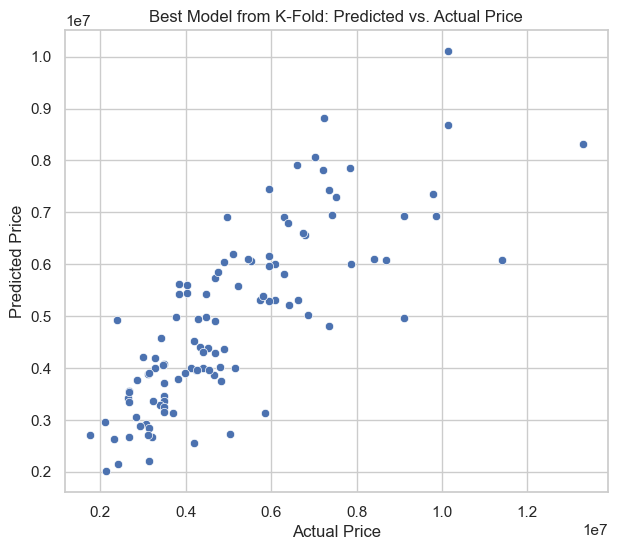

In [42]:
# Show scatterplot comparing actual against predicted prices with the best model

plt.figure(figsize=(7, 6))
sns.scatterplot(x=y_ts, y=y_best_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Best Model from K-Fold: Predicted vs. Actual Price")
plt.show()

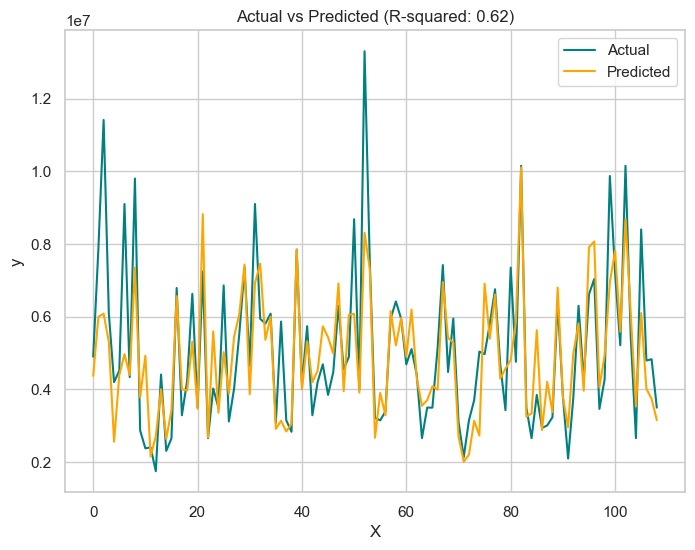

In [43]:
# Create plot comparing actual against predicted prices with the best model with R-squared

plt.figure(figsize=(8, 6))
plt.plot(np.arange(len(y_ts)), y_ts, label='Actual', color='teal')
plt.plot(np.arange(len(y_ts)), y_best_pred, label='Predicted', color='orange')
plt.xlabel('X')
plt.ylabel('y')
plt.title(f'Actual vs Predicted (R-squared: {r2_test[best_model_number]:.2f})')
plt.legend()
plt.show()

In [44]:
# Print the shape of training data from best fold
print("Shape of the Training Data from the Best Fold:", best_training_data[0].shape)

Shape of the Training Data from the Best Fold: (422, 9)


In [45]:
# Add constant column to the training data & perform OLS regression
X_train_kf = sm.add_constant(best_training_data[0])

lr = sm.OLS(best_training_data[1], X_train_kf).fit()

sorted_indices = np.argsort(lr.params)[::-1]

print("Index\tValue")
for index in sorted_indices:
    value = lr.params[index]
    print(f"{index}\t{value:.4f}")

Index	Value
3	1151805.4674
6	789191.5354
8	698605.3255
9	594497.8366
5	586268.5398
4	375868.5821
7	229879.2354
2	127004.2418
1	229.2580
0	-457214.2456


# More Models

In [46]:
# Extract target variable 'price' & feature matrix X

y = final_data['price']
X = final_data.drop(columns=['price'])

# Display first few rows of feature matrix X 
display(X.head())

# Print number of rows & columns in X
print(f"\nTotal Rows: {X.shape[0]}, Total Columns: {X.shape[1]}")

,area,bedrooms,bathrooms,stories,mainroad,airconditioning,parking,prefarea,not_unfurnished
0,7420,4,2,3,1,1,2,1,1
1,8960,4,4,4,1,1,3,0,1
2,9960,3,2,2,1,0,2,1,1
3,7500,4,2,2,1,1,3,1,1
4,7420,4,1,2,1,1,2,0,1



Total Rows: 545, Total Columns: 9


In [47]:
# Create StandardScaler object
scaler = StandardScaler()

# Scale feature matrix X with scaler
X_scaled = scaler.fit_transform(X)

In [48]:
# Split scaled feature matrix & target variable into training/test sets
test_size = 0.3
random_state = 0
shuffle = True

x_tra, x_tes, y_tra, y_tes = train_test_split(X_scaled, y, test_size=test_size, random_state=random_state, shuffle=shuffle)

In [49]:
# Create lists to store evaluation metrics

r2_value = []
adjusted_r2_value = []
mae_value = []
mse_value = []
rmse_value = []

# The cell below is taken from another project to minimize the number of cells.

Source of the code below:

https://github.com/kumod007/House-Price-Prediction/blob/main/House%20Price%20Prediction.ipynb  (Line 87)

LinearRegression() Model Evaluation:
R2 Score: 0.74
MAE: 733750.13
MSE: 916632279618.63


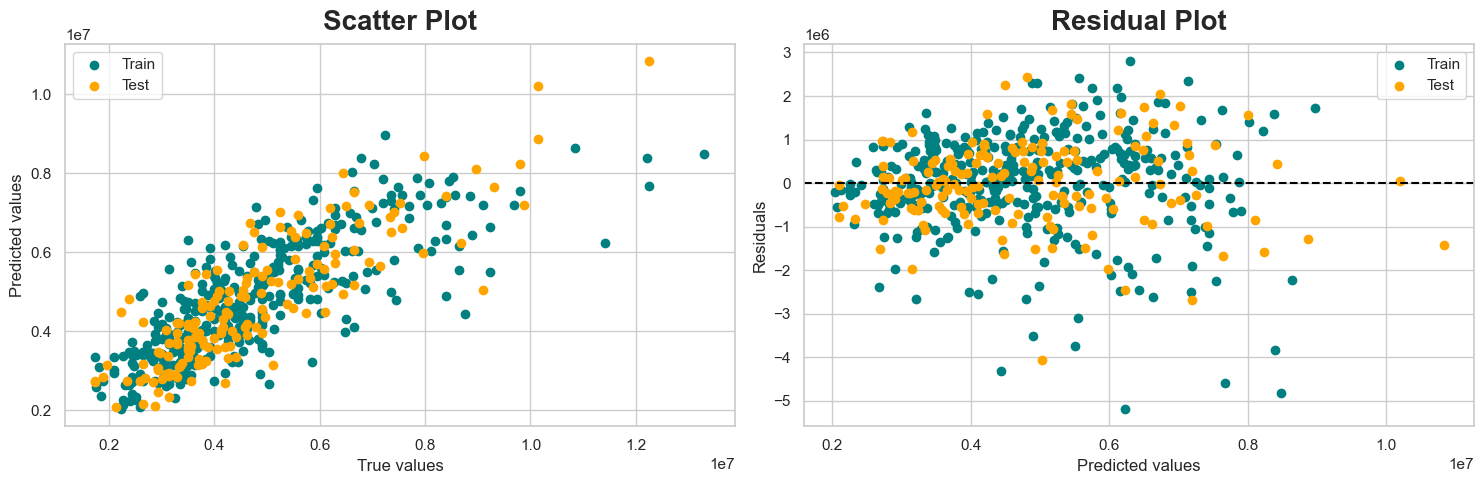


Parameters of LinearRegression() Model:
const    4.763927e+06
x3       5.400685e+05
x1       5.224118e+05
x6       3.958922e+05
x8       3.409127e+05
x4       3.216599e+05
x7       2.245776e+05
x9       2.103494e+05
x5       1.713070e+05
x2       1.437099e+05
dtype: float64


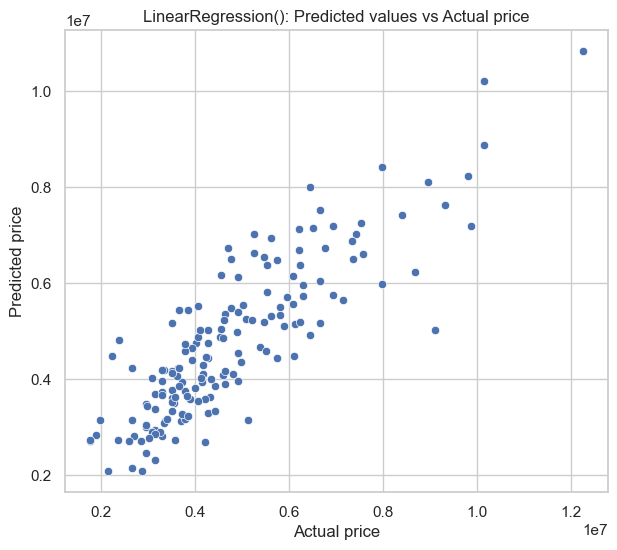

In [50]:
def model_evaluation(model):

    # Fit the model to training data
    model.fit(x_tra, y_tra)

    # Make predictions on both training & test sets
    y_tr_pred = model.predict(x_tra)
    y_ts_pred = model.predict(x_tes)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_tes, y_ts_pred)
    mse = mean_squared_error(y_tes, y_ts_pred)
    r2 = r2_score(y_tes, y_ts_pred)

    # Append metrics to lists
    mae_value.append(mae)
    mse_value.append(mse)
    r2_value.append(r2)

    # Print evaluation metrics
    print(f"{model} Model Evaluation:")
    print(f"R2 Score: {r2:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")

    # Create & display scatter and residual plots
    plt.figure(figsize=(15, 5))
    
    plt.subplot(121)
    plt.scatter(y_tra, y_tr_pred, color='teal', label='Train')
    plt.scatter(y_tes, y_ts_pred, color='orange', label='Test')
    plt.xlabel('True values')
    plt.ylabel('Predicted values')
    plt.legend()
    plt.title('Scatter Plot', fontweight="bold", size=20, pad=10)

    plt.subplot(122)
    plt.scatter(y_tr_pred, y_tr_pred - y_tra, color='teal', label='Train')
    plt.scatter(y_ts_pred, y_ts_pred - y_tes, color='orange', label='Test')
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend()
    plt.title('Residual Plot', fontweight="bold", size=20, pad=10)
    
    plt.tight_layout()
    plt.show()

    # Display scatterplot of actual against predicted prices
    plt.figure(figsize=(7, 6))
    sns.scatterplot(data=x_tes, x=y_tes, y=y_ts_pred).set(xlabel="Actual price", ylabel="Predicted price", title=f"{model}: Predicted values vs Actual price")

    # Perform linear regression
    # Print parameter values
    X_train_lm = sm.add_constant(x_tra)
    lr = sm.OLS(y_tra, X_train_lm).fit()
    params_sorted = lr.params.sort_values(ascending=False)
    print(f"\nParameters of {model} Model:")
    print(params_sorted)

# Call model_evaluation function
model_evaluation(model)

KNeighborsRegressor(n_neighbors=10) Model Evaluation:
R2 Score: 0.69
MAE: 752955.00
MSE: 1082097159693.61


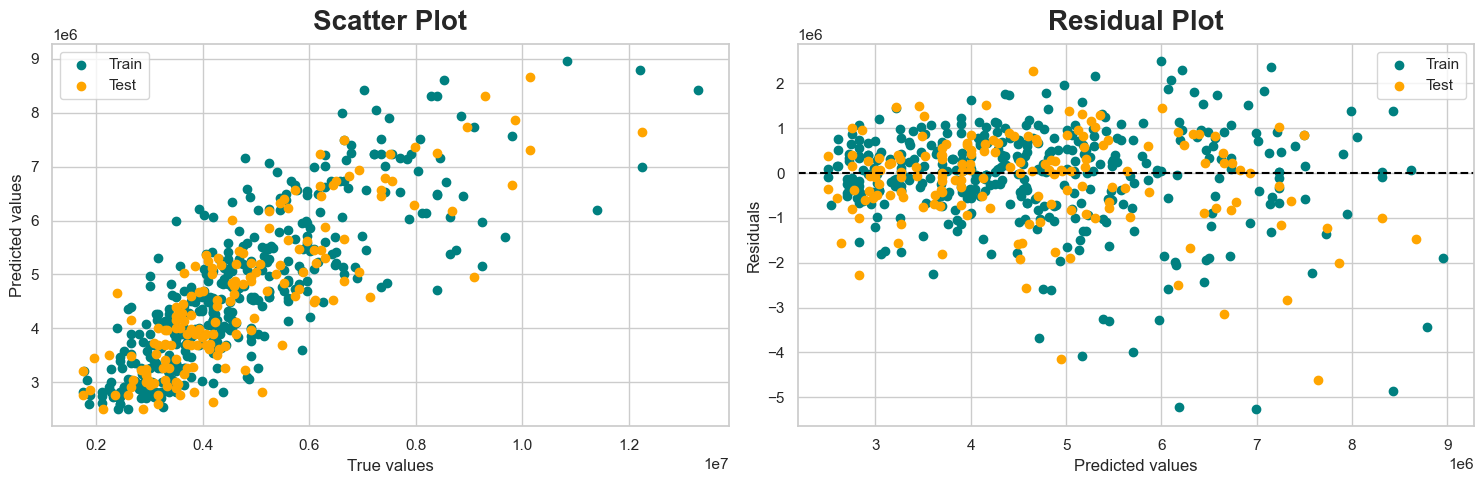


Parameters of KNeighborsRegressor(n_neighbors=10) Model:
const    4.763927e+06
x3       5.400685e+05
x1       5.224118e+05
x6       3.958922e+05
x8       3.409127e+05
x4       3.216599e+05
x7       2.245776e+05
x9       2.103494e+05
x5       1.713070e+05
x2       1.437099e+05
dtype: float64


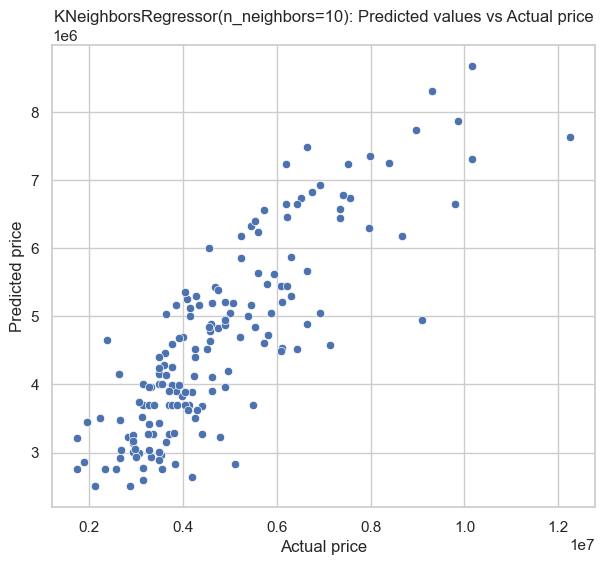

In [51]:
# Call model_evaluation function with KNeighborsRegressor

model_evaluation(KNeighborsRegressor(n_neighbors=10))

RandomForestRegressor() Model Evaluation:
R2 Score: 0.63
MAE: 817874.24
MSE: 1285305313104.46


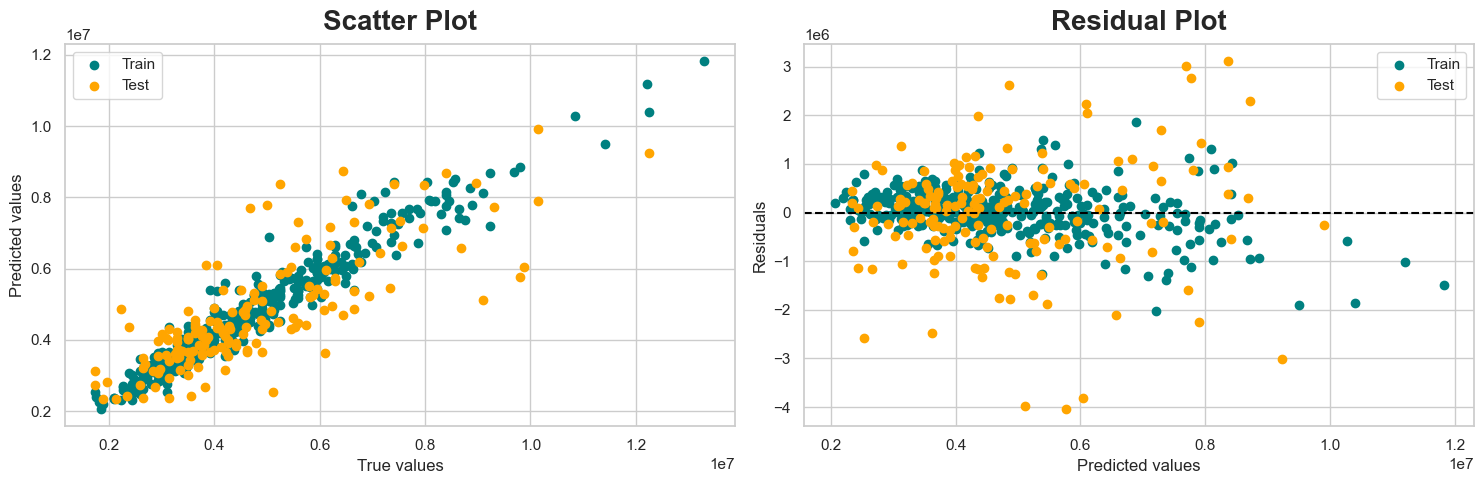


Parameters of RandomForestRegressor() Model:
const    4.763927e+06
x3       5.400685e+05
x1       5.224118e+05
x6       3.958922e+05
x8       3.409127e+05
x4       3.216599e+05
x7       2.245776e+05
x9       2.103494e+05
x5       1.713070e+05
x2       1.437099e+05
dtype: float64


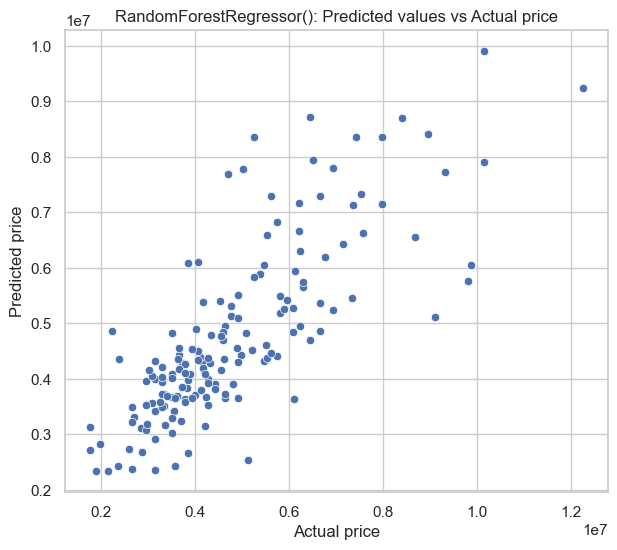

In [52]:
# Call model_evaluation function with RandomForestRegressor
model_evaluation(RandomForestRegressor())